In [1]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
import scipy.linalg as linalg
from qiskit.opflow import X, Z, I, MatrixEvolution
from qiskit.quantum_info.operators import Operator, Pauli

In [2]:
def denys_asymptote(n, j):
    coeff = 2 ** n / np.sqrt(n * np.pi / 2) 
    return coeff * np.exp(-(2 * j) ** 2)

In [3]:
def exact(n, j):
    print(int(n/2) + j)
    print(binom(n, int(n/2) + j))
    return binom(n, int(n/2) + j)

In [4]:
def alt(n, j):
    coeff = 2 ** n * np.sqrt(2 / (np.pi * n))
    return coeff * np.exp(-2 * (j - n / 2) ** 2 / n)

In [5]:
# check with different n for range of j
n10_approx = np.array([denys_asymptote(10, a) for a in range(-2, 3)])
n10_exact = np.array([exact(10, a) for a in range(-2, 3)])

3
120.0
4
210.0
5
252.0
6
210.0
7
120.0


In [6]:
n100_approx = np.array([denys_asymptote(100, a) for a in range(-2, 3)])
n100_exact = np.array([exact(100, a) for a in range(-2, 3)])

48
9.320655887504988e+28
49
9.891308288780802e+28
50
1.0089134454556415e+29
51
9.891308288780802e+28
52
9.320655887504988e+28


In [7]:
n1000_approx = np.array([alt(1000, a) for a in range(1, 1000)])
n1000_exact = np.array([exact(1000, a) for a in range(1, 1000)])

501
2.6974874345867207e+299
502
2.6813669917503724e+299
503
2.65471324431776e+299
504
2.6178422270358435e+299
505
2.5711876130879967e+299
506
2.5152922301938584e+299
507
2.4507975576259498e+299
508
2.3784314880109797e+299
509
2.298994679964338e+299
510
2.2133458585536403e+299
511
2.1223864397083774e+299
512
2.0270448613616122e+299
513
1.9282609987221977e+299
514
1.826971024081094e+299
515
1.724093044084364e+299
516
1.620513810815733e+299
517
1.517076759060925e+299
518
1.4145715726386556e+299
519
1.3137254296951108e+299
520
1.2151960224682968e+299
521
1.11956639306045e+299
522
1.0273415752413583e+299
523
9.389469846378785e+298
524
8.547284573896327e+298
525
7.749538013664489e+298
526
6.998156951503991e+298
527
6.294357485790046e+298
528
5.638695247691653e+298
529
5.03112316996391e+298
530
4.47105474160512e+298
531
3.9574307505751545e+298
532
3.4887876353761738e+298
533
3.0633257286216916e+298
534
2.6789758712851597e+298
535
2.333463095364015e+298
536
2.0243663047454629e+298
537
1.749173

In [8]:
n10_err = np.abs(n10_exact - n10_approx) / np.abs(n10_exact)
n100_err = np.abs(n100_exact - n100_approx) / np.abs(n100_exact)
n1000_err = np.abs(n1000_exact - n1000_approx) / np.abs(n1000_exact)

/tmp/ipykernel_2797065/800688987.py:3: RuntimeWarning: divide by zero encountered in divide
  n1000_err = np.abs(n1000_exact - n1000_approx) / np.abs(n1000_exact)


In [9]:
n1000_exact

array([2.69748743e+299, 2.68136699e+299, 2.65471324e+299, 2.61784223e+299,
       2.57118761e+299, 2.51529223e+299, 2.45079756e+299, 2.37843149e+299,
       2.29899468e+299, 2.21334586e+299, 2.12238644e+299, 2.02704486e+299,
       1.92826100e+299, 1.82697102e+299, 1.72409304e+299, 1.62051381e+299,
       1.51707676e+299, 1.41457157e+299, 1.31372543e+299, 1.21519602e+299,
       1.11956639e+299, 1.02734158e+299, 9.38946985e+298, 8.54728457e+298,
       7.74953801e+298, 6.99815695e+298, 6.29435749e+298, 5.63869525e+298,
       5.03112317e+298, 4.47105474e+298, 3.95743075e+298, 3.48878764e+298,
       3.06332573e+298, 2.67897587e+298, 2.33346310e+298, 2.02436630e+298,
       1.74917312e+298, 1.50532928e+298, 1.29028224e+298, 1.10151873e+298,
       9.36596332e+297, 7.93169218e+297, 6.69008291e+297, 5.62016156e+297,
       4.70237371e+297, 3.91864476e+297, 3.25240351e+297, 2.68857444e+297,
       2.21354398e+297, 1.81510606e+297, 1.48239152e+297, 1.20578586e+297,
       9.76839176e+296, 7

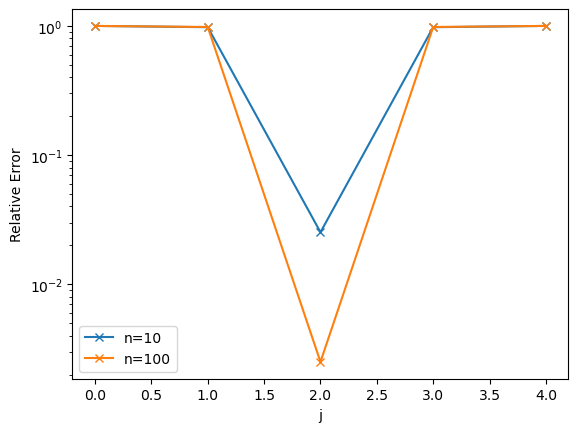

In [10]:
plt.semilogy(n10_err, 'x-', label='n=10')
plt.semilogy(n100_err, 'x-', label='n=100')
#plt.semilogy(n1000_err[450:550], 'x-', label='n=1000')
plt.xlabel("j")
plt.ylabel("Relative Error")
plt.legend()

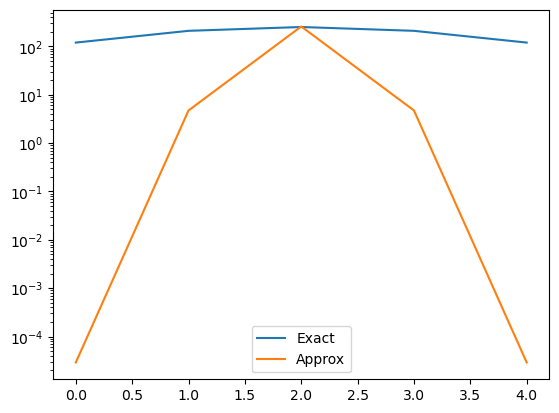

In [11]:
plt.semilogy(n10_exact, label='Exact')
plt.semilogy(n10_approx, label='Approx')
plt.legend()

In [12]:
n100_approx

array([1.13822447e+22, 1.85251486e+27, 1.01143884e+29, 1.85251486e+27,
       1.13822447e+22])

In [13]:
# import functions from stomp_functions.py
import stomp_functions as stf

In [14]:
# Define system parameters
N = 2
g = 1
J = 1

In [15]:
# Set up beta values and step size
beta = 0.4
num_steps = 200
betas, dt = np.linspace(0, beta, num_steps, retstep=True)
init_wf = [0, 0, 0, 1]

In [16]:
# Construct tensored lists of pauli x and z for creating hamiltonian
z_ops, x_ops = stf.construct_op_lists(N)

In [17]:
# Construct the Hamiltonian
# Loop over sites to construct parts of H
H_qis = 0
for n in range(N-1):
    H_qis += -J * z_ops[n] @ z_ops[n+1]
    for m in range(N):
        H_qis += -J * g * x_ops[n]
        
# Get eigenenergies from H
E_qis, V_qis = linalg.eigh(H_qis.to_matrix())

H_qis -= E_qis[0] * (I ^ I)

E_qis, V_qis = linalg.eigh(H_qis.to_matrix())

In [18]:
# Classical calculation
class_ovlp, class_H_ovlp = stf.classical_calc(np.array(init_wf), H_qis.to_matrix(), 
                                              H_qis.to_matrix(), num_steps, dt)

In [19]:
def alt_partition_calc(ovlp_list, obs_ovlp_list, num_steps):
    # k = 0 term
    partition_list = [ovlp_list[1]]
    expect_list = [obs_ovlp_list[1]]
    
    for m in range(3, num_steps, 2):
        partition = 0
        E = 0
        for k in range(0, m, 2):
            partition += np.exp(- k / 2 * (k / m - 2)) * ovlp_list[int(m/2)-k].conj()
            
            E += np.exp(-2 * k * (k / m - 2)) * obs_ovlp_list[int(m/2)-k].conj()
            
        partition *= 2 ** m * np.sqrt(2 / (m * np.pi)) * np.exp(-m / 2)
        partition = np.abs(partition)
        partition_list.append(partition)
        expect_list.append(E / partition)
        
    return partition_list, expect_list

In [20]:
def partition_calc(ovlp_list, obs_ovlp_list, num_steps):
    partition_list = [ovlp_list[1]]
    expect_list = [obs_ovlp_list[1]]

    for m in range(3, num_steps, 2):
        partition = 0
        E = 0
        
        for k in range(0, m, 2):
            #partition += binom(m, int(k/2)) * ovlp_list[m-k]
            partition += np.exp(-2*(int(k/2) - m /2) ** 2 / m) * ovlp_list[m-k]
            #E += binom(m, int(k/2)) * obs_ovlp_list[m-k]
            
            E += np.exp(-2*(int(k/2) - m /2) ** 2 / m) * obs_ovlp_list[m-k]
        
        partition = np.abs(partition)
    
        partition_list.append(partition)
        expect_list.append(E / partition)
    
    return partition_list, expect_list

In [21]:
part_list, E_list = partition_calc(class_ovlp, class_H_ovlp, num_steps)
alt_part_list, alt_E_list = alt_partition_calc(class_ovlp, class_H_ovlp, num_steps)

/home/jacob/anaconda3/envs/EnergyGaps/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


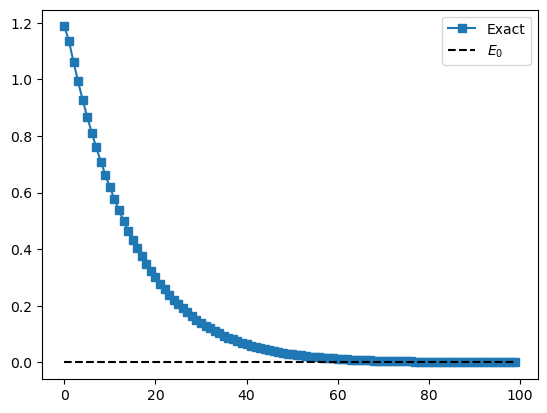

In [22]:
plt.plot(E_list, 's-', label='Exact')
#plt.plot(alt_E_list, 'o-', label='Approx')
plt.plot(E_qis[0]*np.ones(len(E_list)), 'k--', label='$E_0$')
plt.legend()


In [23]:
alt_part_list

[(0.9889629637168674-0.07732598161920798j),
 3.92656938609124,
 15.670660722189867,
 61.70442376834692,
 240.6163604295319,
 928.2343528606289,
 3550.3918945206706,
 13441.688191665264,
 50493.518070884405,
 188197.71019174595,
 698830.6598418987,
 2595231.713403071,
 9716610.485926421,
 36995791.84778461,
 144536574.47689977,
 581839527.6911556,
 2407414201.0940957,
 10158752015.621141,
 43304741646.163284,
 185007717281.9266,
 787657868753.6533,
 3330476086929.7095,
 13958670491361.324,
 57935040115677.7,
 238019781375136.25,
 967885479680706.1,
 3895942728686208.5,
 1.552657490093642e+16,
 6.128585024134986e+16,
 2.3970710599881658e+17,
 9.297254838185725e+17,
 3.5797655903844444e+18,
 1.3705240526967974e+19,
 5.229712284283625e+19,
 1.9955082106331444e+20,
 7.646102787515438e+20,
 2.956014601694296e+21,
 1.1581769258211983e+22,
 4.6118472994592685e+22,
 1.86684464171828e+23,
 7.663270577768323e+23,
 3.1766079420277437e+24,
 1.323458186307357e+25,
 5.518402433773122e+25,
 2.29525344

In [24]:
m = 3
for i in range(0, m, 2):
    print(i)

0
2


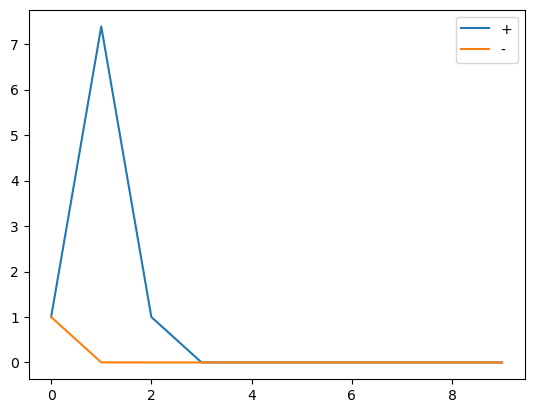

In [25]:
k = np.arange(0, 10)
test = np.exp(4*k - 2 * k ** 2)
test2 = np.exp(-4*k - 2 * k ** 2)
plt.plot(test, label='+')
plt.plot(test2, label='-')
plt.legend()

In [26]:
binom(5, 0)

1.0

1.0


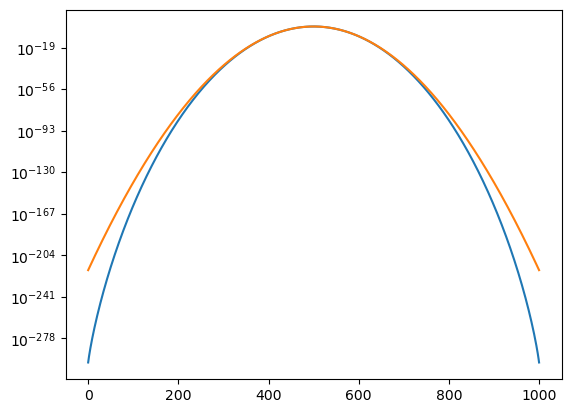

In [32]:
n = 1000
j = np.arange(n + 1)
temp = binom(n, j)
temp /= temp.max()

plt.semilogy(temp)
plt.semilogy(np.exp(-2*(j - n /2) ** 2 / n))
print(np.max(np.exp(-2*(j - n /2) ** 2 / n)))
#plt.xlim([30, 70])